<a href="https://colab.research.google.com/github/Kriegtho/2022_ML_EES/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
rnd_seed = 42
rnd_gen = np.random.default_rng(rnd_seed)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


In [2]:
import pooch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [3]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [5]:
# libraries for the files in google drive
import pandas as pd
from pydrive.auth import GoogleAuth
from google.colab import drive
from google.colab import auth
from pydrive.drive import GoogleDrive
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id = '1jfdPGLWpRHH9eCJDuy5a1sNlK1Xp0XV3'

download = drive.CreateFile({'id': file_id})

# Download the file to a local disc
download.GetContentFile('StormEvents_details-ftp_v1.0_d2009_c20220425.csv')
df  = pd.read_csv("StormEvents_details-ftp_v1.0_d2009_c20220425.csv")
df

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,200912,9,400,200912,9,1400,35732,206802,NEW HAMPSHIRE,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Strong low pressure moved over the Cape Cod Ca...,A tree was downed in Pelham by heavy snow and ...,CSV
1,200901,18,300,200901,18,1700,25713,150209,NEW HAMPSHIRE,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A low pressure system in the Great Lakes redev...,Seven inches of snow fell in eastern Hillsboro...,CSV
2,200901,28,950,200901,28,2200,25704,150108,NEW HAMPSHIRE,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A strong low pressure system moved through sou...,Nearly six inches of snow fell across eastern ...,CSV
3,200901,7,900,200901,7,2000,25707,150115,NEW HAMPSHIRE,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A low pressure system moved across the Ohio Va...,An eighth of an inch of ice and 2.6 inches of ...,CSV
4,200901,11,0,200901,11,1300,25710,150128,NEW HAMPSHIRE,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A low pressure system moved across the Ohio Va...,Eight inches of snow fell in eastern Hillsboro...,CSV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57393,200907,18,1705,200907,18,1705,32466,190198,LOUISIANA,22,...,7.0,N,HOLLY BEACH,29.8648,-93.4693,29.8648,-93.4693,A line of strong to severe thunderstorms devel...,Cameron Pilot reported lightning started a fir...,CSV
57394,200907,18,1800,200907,18,1800,32462,190059,TEXAS,48,...,1.0,WSW,PEVETO,30.1226,-93.8395,30.1226,-93.8395,A line of strong to severe thunderstorms devel...,Beaumont Enterprise reported the Old First Bap...,CSV
57395,200907,18,1540,200907,18,1540,32462,190066,TEXAS,48,...,0.0,SW,PINE FOREST,30.1773,-94.0337,30.1773,-94.0337,A line of strong to severe thunderstorms devel...,An 84 year old Pine Forest resident was killed...,CSV
57396,200907,18,1625,200907,18,1625,32462,190070,TEXAS,48,...,0.0,N,BEAUMONT,30.0800,-94.1000,30.0800,-94.1000,A line of strong to severe thunderstorms devel...,Beaumont Enterprise reported numerous downed p...,CSV


In [6]:
df = pd.DataFrame(df)
df

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,200912,9,400,200912,9,1400,35732,206802,NEW HAMPSHIRE,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Strong low pressure moved over the Cape Cod Ca...,A tree was downed in Pelham by heavy snow and ...,CSV
1,200901,18,300,200901,18,1700,25713,150209,NEW HAMPSHIRE,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A low pressure system in the Great Lakes redev...,Seven inches of snow fell in eastern Hillsboro...,CSV
2,200901,28,950,200901,28,2200,25704,150108,NEW HAMPSHIRE,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A strong low pressure system moved through sou...,Nearly six inches of snow fell across eastern ...,CSV
3,200901,7,900,200901,7,2000,25707,150115,NEW HAMPSHIRE,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A low pressure system moved across the Ohio Va...,An eighth of an inch of ice and 2.6 inches of ...,CSV
4,200901,11,0,200901,11,1300,25710,150128,NEW HAMPSHIRE,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A low pressure system moved across the Ohio Va...,Eight inches of snow fell in eastern Hillsboro...,CSV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57393,200907,18,1705,200907,18,1705,32466,190198,LOUISIANA,22,...,7.0,N,HOLLY BEACH,29.8648,-93.4693,29.8648,-93.4693,A line of strong to severe thunderstorms devel...,Cameron Pilot reported lightning started a fir...,CSV
57394,200907,18,1800,200907,18,1800,32462,190059,TEXAS,48,...,1.0,WSW,PEVETO,30.1226,-93.8395,30.1226,-93.8395,A line of strong to severe thunderstorms devel...,Beaumont Enterprise reported the Old First Bap...,CSV
57395,200907,18,1540,200907,18,1540,32462,190066,TEXAS,48,...,0.0,SW,PINE FOREST,30.1773,-94.0337,30.1773,-94.0337,A line of strong to severe thunderstorms devel...,An 84 year old Pine Forest resident was killed...,CSV
57396,200907,18,1625,200907,18,1625,32462,190070,TEXAS,48,...,0.0,N,BEAUMONT,30.0800,-94.1000,30.0800,-94.1000,A line of strong to severe thunderstorms devel...,Beaumont Enterprise reported numerous downed p...,CSV


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [7]:
df.isna().sum()

BEGIN_YEARMONTH           0
BEGIN_DAY                 0
BEGIN_TIME                0
END_YEARMONTH             0
END_DAY                   0
END_TIME                  0
EPISODE_ID                0
EVENT_ID                  0
STATE                     0
STATE_FIPS                0
YEAR                      0
MONTH_NAME                0
EVENT_TYPE                0
CZ_TYPE                   0
CZ_FIPS                   0
CZ_NAME                   0
WFO                       0
BEGIN_DATE_TIME           0
CZ_TIMEZONE               0
END_DATE_TIME             0
INJURIES_DIRECT           0
INJURIES_INDIRECT         0
DEATHS_DIRECT             0
DEATHS_INDIRECT           0
DAMAGE_PROPERTY        8720
DAMAGE_CROPS           8704
SOURCE                    0
MAGNITUDE             25364
MAGNITUDE_TYPE        38705
FLOOD_CAUSE           51329
CATEGORY              57397
TOR_F_SCALE           56125
TOR_LENGTH            56125
TOR_WIDTH             56125
TOR_OTHER_WFO         57283
TOR_OTHER_CZ_STATE  

In [8]:
df.describe()

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE_FIPS,YEAR,...,CATEGORY,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_CZ_FIPS,BEGIN_RANGE,END_RANGE,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON
count,57398.000000,57398.000000,57398.000000,57398.000000,57398.000000,57398.000000,57398.000000,57398.000000,57398.000000,57398.0,...,1.0,1273.000000,1273.000000,115.000000,37573.000000,37573.000000,37573.000000,37573.000000,37573.000000,37573.000000
mean,200906.041204,14.892174,1316.168351,200906.041221,15.859542,1430.992630,30027.738806,176563.456793,31.078557,2009.0,...,4.0,2.444423,142.087251,104.373913,2.470897,2.494717,37.116742,-90.685642,37.110546,-90.676459
std,3.126154,8.782394,652.409338,3.126140,8.855667,593.868956,3225.193994,18196.775879,17.931266,0.0,...,NaN,3.426312,207.843721,80.748414,4.254329,4.165946,4.881766,10.473853,4.879221,10.472503
min,200901.000000,1.000000,0.000000,200901.000000,1.000000,0.000000,23948.000000,139587.000000,1.000000,2009.0,...,4.0,0.010000,1.000000,1.000000,0.000000,0.000000,-14.326900,-170.837400,-14.381900,-170.824000
25%,200904.000000,8.000000,830.000000,200904.000000,9.000000,1045.000000,27254.000000,161341.250000,19.000000,2009.0,...,4.0,0.330000,33.000000,54.000000,1.000000,1.000000,34.000000,-97.320000,33.992400,-97.317100
50%,200906.000000,14.000000,1500.000000,200906.000000,15.000000,1543.000000,29928.500000,176471.500000,30.000000,2009.0,...,4.0,1.180000,75.000000,87.000000,1.000000,1.000000,37.050000,-90.846700,37.050000,-90.820000
75%,200908.000000,23.000000,1811.000000,200908.000000,24.000000,1845.000000,32622.000000,191511.750000,46.000000,2009.0,...,4.0,3.110000,150.000000,130.000000,3.000000,3.000000,40.400000,-83.180000,40.395000,-83.176500
max,200912.000000,31.000000,2359.000000,200912.000000,31.000000,2359.000000,71866.000000,432912.000000,99.000000,2009.0,...,4.0,26.330000,1760.000000,499.000000,177.000000,176.000000,70.432200,-64.730000,70.434200,-64.730000


In [45]:
df=df.loc[:,['BEGIN_YEARMONTH', 'BEGIN_DAY', 'BEGIN_TIME','END_YEARMONTH', 'END_DAY','END_TIME','STATE','MONTH_NAME','EVENT_TYPE']]
df

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,STATE,MONTH_NAME,EVENT_TYPE
0,200912,9,400,200912,9,1400,NEW HAMPSHIRE,December,Heavy Snow
1,200901,18,300,200901,18,1700,NEW HAMPSHIRE,January,Heavy Snow
2,200901,28,950,200901,28,2200,NEW HAMPSHIRE,January,Winter Storm
3,200901,7,900,200901,7,2000,NEW HAMPSHIRE,January,Winter Storm
4,200901,11,0,200901,11,1300,NEW HAMPSHIRE,January,Heavy Snow
...,...,...,...,...,...,...,...,...,...
57393,200907,18,1705,200907,18,1705,LOUISIANA,July,Lightning
57394,200907,18,1800,200907,18,1800,TEXAS,July,Lightning
57395,200907,18,1540,200907,18,1540,TEXAS,July,Thunderstorm Wind
57396,200907,18,1625,200907,18,1625,TEXAS,July,Thunderstorm Wind


In [46]:
df.shape

(57398, 9)

In [47]:
df['EVENT_TYPE'].value_counts()

Thunderstorm Wind           13379
Hail                        13313
Flash Flood                  4091
Winter Storm                 3341
High Wind                    2968
Winter Weather               2954
Heavy Snow                   2306
Flood                        1978
Strong Wind                  1328
Tornado                      1273
Blizzard                     1247
Drought                      1242
Heavy Rain                   1087
Marine Thunderstorm Wind      984
Lightning                     721
Frost/Freeze                  649
Extreme Cold/Wind Chill       567
High Surf                     534
Funnel Cloud                  449
Ice Storm                     442
Cold/Wind Chill               436
Dense Fog                     370
Wildfire                      245
Heat                          241
Waterspout                    224
Coastal Flood                 201
Lake-Effect Snow              148
Excessive Heat                146
Tropical Storm                130
Dust Storm    

In [261]:
# Conversion of the categorical data in string type. The name become number
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
df["STATE"] = ord_enc.fit_transform(df[["STATE"]])
df["MONTH_NAME"] = ord_enc.fit_transform(df[["MONTH_NAME"]])


In [262]:
# Select features for x
x=df.iloc[:,:8]
print(x)

       BEGIN_YEARMONTH  BEGIN_DAY  BEGIN_TIME  END_YEARMONTH  END_DAY  \
0               200912          9         400         200912        9   
1               200901         18         300         200901       18   
2               200901         28         950         200901       28   
3               200901          7         900         200901        7   
4               200901         11           0         200901       11   
...                ...        ...         ...            ...      ...   
57393           200907         18        1705         200907       18   
57394           200907         18        1800         200907       18   
57395           200907         18        1540         200907       18   
57396           200907         18        1625         200907       18   
57397           200907         18        1545         200907       18   

       END_TIME  STATE  MONTH_NAME  
0          1400   43.0         2.0  
1          1700   43.0         4.0  
2          2

In [263]:
# Select feature for y
y = df.iloc[:,8] 
print(y)

0               Heavy Snow
1               Heavy Snow
2             Winter Storm
3             Winter Storm
4               Heavy Snow
               ...        
57393            Lightning
57394            Lightning
57395    Thunderstorm Wind
57396    Thunderstorm Wind
57397    Thunderstorm Wind
Name: EVENT_TYPE, Length: 57398, dtype: object


In [264]:
from sklearn.model_selection import train_test_split

# split data between  train and test set 
x_train, x_test, y_train, y_test = train_test_split(
    x, #  x data 
    y, #  y data
    test_size = 0.3, # the percent of data to retain as a test
    random_state = 42 ) # set the random seed

In [219]:
print(x_train)
print(y_train)
print(x_test)
print(y_test)


       BEGIN_YEARMONTH  BEGIN_DAY  BEGIN_TIME  END_YEARMONTH   END_DAY  \
0            -0.977960  -0.900481   -1.986822      -0.977960 -0.998495   
1            -0.977960   1.032631   -0.005959      -0.977960  0.917604   
2            -0.017553   0.009219    0.203200      -0.017553 -0.096801   
3             1.903262   1.601193    0.581533       1.903262  1.593874   
4             0.622719  -0.673056    0.509249       0.622719 -0.773071   
...                ...        ...         ...            ...       ...   
28119         0.302583   0.805206    0.672271       0.302583  0.692181   
28120        -0.337688  -0.218206    0.489256      -0.337688 -0.322225   
28121        -0.017553   1.260056    0.350842      -0.017553  1.143027   
28122        -0.977960   0.236644   -1.725373      -0.977960  0.128622   
28123         1.903262  -0.673056    1.196707       1.903262 -0.660360   

       END_TIME     STATE  MONTH_NAME  
0     -2.367392  0.142145    0.714403  
1     -0.194918 -0.625753    0.

In [265]:
# Normalization (inspiration: https://towardsdatascience.com/a-practical-guide-to-implementing-a-random-forest-classifier-in-python-979988d8a263)
from sklearn import preprocessing
sc = preprocessing.StandardScaler()
x_train= pd.DataFrame(sc.fit_transform(x_train), columns = x.columns)
x_test= pd.DataFrame(sc.fit_transform(x_test), columns = x.columns)
print(x_train)
print(x_test)

       BEGIN_YEARMONTH  BEGIN_DAY  BEGIN_TIME  END_YEARMONTH   END_DAY  \
0            -0.332639  -0.103133   -0.446953      -0.332639 -0.208853   
1             0.307513  -0.103133    0.356464       0.307513 -0.208853   
2            -1.292867  -0.331028   -0.923166      -1.292867 -0.434771   
3            -0.652715   0.352656    0.602252      -0.652715  0.242984   
4            -0.652715   0.808446    0.909486      -0.652715  0.694821   
...                ...        ...         ...            ...       ...   
40173         0.627589  -0.444976    0.285800       0.627589 -0.547730   
40174        -0.332639   1.720025    0.815779      -0.332639  1.598494   
40175         1.907893  -0.331028   -0.185804       1.907893 -0.434771   
40176         1.587817  -0.331028   -0.185804       1.587817 -0.434771   
40177        -0.012563   0.466604    0.582281      -0.012563  0.355943   

       END_TIME     STATE  MONTH_NAME  
0      1.124711 -0.166981    1.046909  
1      0.202632  0.037687    0.

**KNN part**

In [266]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [267]:
knn_clf = KNeighborsClassifier() # initiate the KNN model

In [268]:
param_grid = {'weights':['uniform', 'distance'], # 1st hyperparameter and the values it can take
              'n_neighbors':[3,4,5,6] # 2nd hyperparameter and the values it can take
              }

In [269]:
grid_search = GridSearchCV( 
    knn_clf, # model used
    param_grid, # The method dictionary of parameters we'll iterate through in the search
    cv = 6, # The number of folds used to cross-validate
    verbose = 3) #Let's set the verbosity to the highest level: 3

In [270]:
grid_search.fit(x_train, y_train)

Fitting 6 folds for each of 8 candidates, totalling 48 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(


[CV 1/6] END ....n_neighbors=3, weights=uniform;, score=0.648 total time=   0.4s
[CV 2/6] END ....n_neighbors=3, weights=uniform;, score=0.659 total time=   0.4s
[CV 3/6] END ....n_neighbors=3, weights=uniform;, score=0.665 total time=   0.4s
[CV 4/6] END ....n_neighbors=3, weights=uniform;, score=0.659 total time=   0.4s
[CV 5/6] END ....n_neighbors=3, weights=uniform;, score=0.652 total time=   0.4s
[CV 6/6] END ....n_neighbors=3, weights=uniform;, score=0.654 total time=   0.4s
[CV 1/6] END ...n_neighbors=3, weights=distance;, score=0.679 total time=   0.2s
[CV 2/6] END ...n_neighbors=3, weights=distance;, score=0.689 total time=   0.2s
[CV 3/6] END ...n_neighbors=3, weights=distance;, score=0.686 total time=   0.2s
[CV 4/6] END ...n_neighbors=3, weights=distance;, score=0.688 total time=   0.2s
[CV 5/6] END ...n_neighbors=3, weights=distance;, score=0.681 total time=   0.2s
[CV 6/6] END ...n_neighbors=3, weights=distance;, score=0.675 total time=   0.2s
[CV 1/6] END ....n_neighbors

GridSearchCV(cv=6, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5, 6],
                         'weights': ['uniform', 'distance']},
             verbose=3)

In [234]:
#Import the accuracy metric
from sklearn.metrics import accuracy_score

y_pred_train = grid_search.predict(x_train) # model prediction for train set
y_pred_test = grid_search.predict(x_test) # model prediction for test set

accuracy_train = accuracy_score(y_train, y_pred_train) # accuracy score for train set
accuracy_test = accuracy_score(y_test, y_pred_test) # accuracy score for train set

# print the accuracy of the models
print(f'The accuracy of the model with train set is {accuracy_train:.2%}')
print(f'The accuracy of the model with test set is {accuracy_test:.2%}')

The accuracy of the model with train set is 98.66%
The accuracy of the model with test set is 67.51%


In [252]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_test)

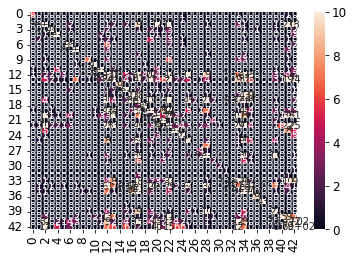

In [254]:
import seaborn
seaborn.heatmap(cm,annot=True,vmax=10,vmin=0)

In [241]:
from sklearn.ensemble import RandomForestClassifier
     
# 
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [242]:
rfc_train_preds = rfc.predict(x_train) # predict for the train set
rfc_test_preds = rfc.predict(x_test) # predict for the test set

In [243]:
from sklearn.metrics import accuracy_score


In [244]:
rfc_train_acc = accuracy_score(y_train, rfc_train_preds) # accuracy score fore the train set
print(f'accuracy score for the train set :{rfc_train_acc:.2%}')

rfc_test_acc=accuracy_score(y_test, rfc_test_preds) # accuracy score for the train set
print(f'accuracy score for the test set :{rfc_test_acc:.2%}')


accuracy score for the train set :98.66%
accuracy score for the test set :69.83%


Features importances for Random Forest

In [248]:
feature_imp_rfc = pd.Series(rfc.feature_importances_)
feature_imp_rfc

0    0.037402
1    0.120994
2    0.229768
3    0.038053
4    0.119971
5    0.240141
6    0.184055
7    0.029616
dtype: float64

In [249]:
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)

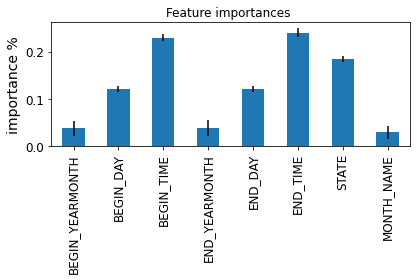

In [260]:
forest_importances = pd.Series(importances, index=x_train.columns)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances ")
ax.set_ylabel("importance %")
fig.tight_layout()

In [257]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train,rfc_test_preds)

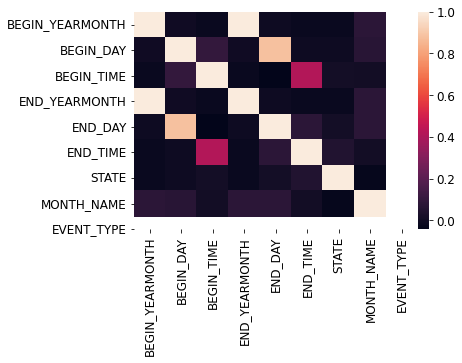

In [274]:
import seaborn
seaborn.heatmap(df.corr(),
                xticklabels=df.columns,
                yticklabels=df.columns)